In [208]:
# import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### preprocessing

In [209]:
# import the dataset
df = pd.read_csv('Titanic-Dataset.csv')

# handle null and unimportant values
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
df['Age'] = df['Age'].bfill() # fillna(int(df['Age'].mean()))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# mapping
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df['Embarked'] = df['Embarked'].map({'S': 1, 'C': 2, 'Q': 3})

In [210]:
sc = StandardScaler()
df[['Age', 'Fare']] = sc.fit_transform(df[['Age', 'Fare']])

In [211]:
X = df.drop('Survived', axis=1)
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## classification

### xgboost

In [212]:
xgb = XGBClassifier(
    objective='binary:logistic',
    device='cuda',
    n_estimators=100,
    learning_rate=0.1,
    gamma=0,
    max_depth=7,
    min_child_weight=0.5,
    colsample_bytree=0.7,
    reg_alpha=0.01,
    )

xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=0, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=0.5, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [213]:
y_pred = xgb.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       105
           1       0.84      0.76      0.79        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



<Axes: >

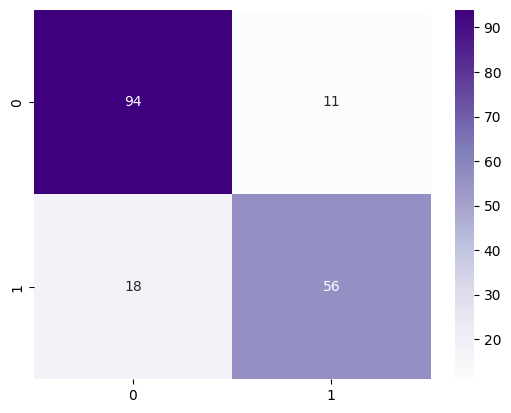

In [214]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='.0f',
    cmap='Purples'
    )

### catboost

In [215]:
cat = CatBoostClassifier(
    task_type='GPU',
    iterations=200,
    learning_rate=0.1,
    depth=6,
    random_seed=123
    )

cat.fit(X_train, y_train)

0:	learn: 0.6218258	total: 9.56ms	remaining: 1.9s
1:	learn: 0.5719970	total: 17.4ms	remaining: 1.72s
2:	learn: 0.5282999	total: 25.1ms	remaining: 1.65s
3:	learn: 0.5004008	total: 31.2ms	remaining: 1.53s
4:	learn: 0.4777475	total: 37.5ms	remaining: 1.46s
5:	learn: 0.4605403	total: 45.1ms	remaining: 1.46s
6:	learn: 0.4420601	total: 52.5ms	remaining: 1.45s
7:	learn: 0.4290187	total: 58.8ms	remaining: 1.41s
8:	learn: 0.4173162	total: 66.3ms	remaining: 1.41s
9:	learn: 0.4074122	total: 73.7ms	remaining: 1.4s
10:	learn: 0.3991834	total: 81ms	remaining: 1.39s
11:	learn: 0.3939885	total: 88ms	remaining: 1.38s
12:	learn: 0.3922757	total: 92.4ms	remaining: 1.33s
13:	learn: 0.3869995	total: 99.8ms	remaining: 1.32s
14:	learn: 0.3836107	total: 107ms	remaining: 1.31s
15:	learn: 0.3795318	total: 113ms	remaining: 1.3s
16:	learn: 0.3746166	total: 120ms	remaining: 1.29s
17:	learn: 0.3703009	total: 126ms	remaining: 1.27s
18:	learn: 0.3673730	total: 133ms	remaining: 1.26s
19:	learn: 0.3655534	total: 139ms	

In [216]:
y_pred = cat.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       105
           1       0.79      0.82      0.81        74

    accuracy                           0.84       179
   macro avg       0.83      0.84      0.83       179
weighted avg       0.84      0.84      0.84       179



<Axes: >

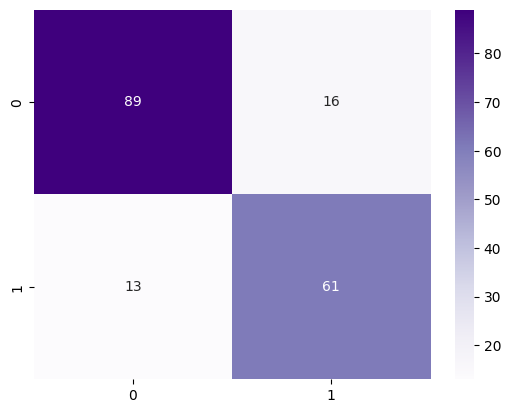

In [217]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='.0f',
    cmap='Purples'
    )

### lightgbm

In [218]:
light = LGBMClassifier(
    device='GPU',
    gpu_device_id=0,
    n_estimators=100,
    learning_rate=0.1,
    num_leaves=30,
    )

light.fit(X_train, y_train)

LGBMClassifier(device='GPU', gpu_device_id=0, num_leaves=30)

In [219]:
y_pred = light.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       105
           1       0.81      0.80      0.80        74

    accuracy                           0.84       179
   macro avg       0.83      0.83      0.83       179
weighted avg       0.84      0.84      0.84       179



<Axes: >

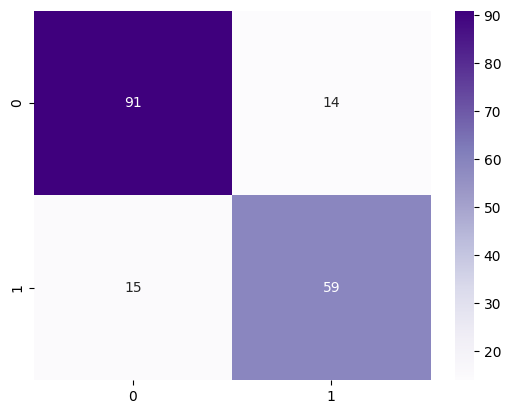

In [220]:
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    fmt='.0f',
    cmap='Purples'
    )